In [3]:
import numpy as np
import yfinance as yf
import pandas as pd
import talib as ta
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('data/WINV23-5.csv', index_col="Data", parse_dates=True, dayfirst=True)
df.sort_values(by='Data', inplace=True)

In [5]:
df['MAH'] = ta.SMA(df['High'], 3)
df['MAL'] = ta.SMA(df['Low'], 3)
df['MAT'] = ta.SMA(df['Close'], 21)
df['MAT'] = df['MAT'].diff()
df["Return"] = df['Close'].pct_change()

df.dropna(inplace=True)

In [36]:
df['entry_signal'] = np.zeros(len(df))
df.loc[(df['MAT'] > 0) & (df['Close'] < df['MAL']), 'entry_signal'] = 1
df.loc[(df['MAT'] < 0) & (df['Close'] > df['MAH']), 'entry_signal'] = -1
# df['entry_signal'] = df['entry_signal'].apply(lambda x: 0 if abs(x) != 1 else x)

n_entradas = len(df.loc[df['entry_signal'] == 1.0])
n_saidas = len(df.loc[df['entry_signal'] == -1.0])
print('Entradas: ', n_entradas)
print('Saidas: ', n_saidas)

Entradas:  563
Saidas:  545


In [40]:
df.head()

,Open,High,Low,Close,MAH,MAL,MAT,Return,entry_signal
Data,,,,,,,,,
2023-06-05 10:10:00,117.010,117.010,117.010,117.010,117.436667,117.436667,0.328095,-0.006706,1.0
2023-06-06 13:15:00,118.500,118.500,118.500,118.500,117.770000,117.770000,0.357143,0.012734,0.0
2023-06-06 13:35:00,118.350,118.350,118.350,118.350,117.953333,117.953333,0.207143,-0.001266,0.0
2023-06-06 13:45:00,118.500,118.500,118.500,118.500,118.450000,118.450000,0.238095,0.001267,0.0
2023-06-06 14:10:00,118.405,118.405,118.405,118.405,118.418333,118.418333,0.234524,-0.000802,1.0


In [48]:
profits = []
row_interator = df.iterrows()

for i, row in row_interator:
    print(i)
    if row['entry_signal'] == 1:
        print(f'Buy: {i}')
        long = True
        while long:
            print('...')
            i, act_row = next(row_interator)
            if act_row['Close'] > act_row['MAH']:
                long = False
            
    elif row['entry_signal'] == -1:
        print(f'Sell: {i}')
        short = True
        while short:
            print('...')
            i, act_row = next(row_interator)
            if act_row['Close'] < act_row['MAL']:
                short = False

2023-06-05 10:10:00
Buy: 2023-06-05 10:10:00
...
2023-06-06 13:35:00
2023-06-06 13:45:00
2023-06-06 14:10:00
Buy: 2023-06-06 14:10:00
...
2023-06-06 16:40:00
2023-06-07 13:55:00
2023-06-07 14:00:00
2023-06-07 14:05:00
2023-06-09 09:25:00
2023-06-09 09:30:00
2023-06-09 09:40:00
2023-06-09 10:00:00
Buy: 2023-06-09 10:00:00
...
...
2023-06-09 10:15:00
Buy: 2023-06-09 10:15:00
...
...
2023-06-09 10:35:00
Buy: 2023-06-09 10:35:00
...
2023-06-09 10:45:00
2023-06-09 11:00:00
2023-06-09 11:05:00
2023-06-09 11:20:00
2023-06-09 11:35:00
2023-06-09 12:05:00
2023-06-09 12:20:00
Buy: 2023-06-09 12:20:00
...
2023-06-09 14:05:00
2023-06-09 14:10:00
2023-06-09 14:20:00
Buy: 2023-06-09 14:20:00
...
...
...
...
2023-06-12 09:00:00
2023-06-12 09:15:00
2023-06-12 09:25:00
2023-06-12 09:30:00
2023-06-12 09:45:00
Buy: 2023-06-12 09:45:00
...
...
...
2023-06-12 12:00:00
2023-06-12 12:10:00
2023-06-12 17:15:00
2023-06-12 17:50:00
2023-06-13 10:10:00
2023-06-13 10:20:00
Buy: 2023-06-13 10:20:00
...
...
...
...

StopIteration: 

In [16]:
profits = []
row_interator = df.iterrows()

for i, row in row_interator:
    cum_return = 0
    if row['entry_signal'] == True:
        while True:
            i, act_row = next(row_interator)
            price_range = act_row['Close'] - df.loc[i].shift()['Close']
#             print(price_range)
            cum_return += price_range
            if act_row['Close'] > act_row['MAH']:
                profits.append(cum_return)
#                 print(f"\nDate: {i}\nProfit: {cum_return}")
                break
            

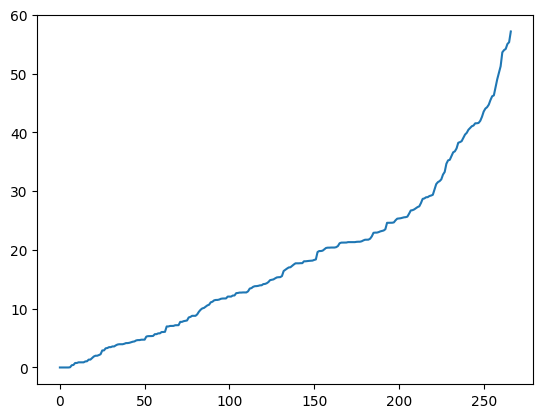

In [17]:
plt.plot(np.array(profits).cumsum())

In [8]:
profits = np.array(profits)